Model Performance Metrics (Overall):
               Metric     Value
0  Mean Squared Error  6.275739
1            R² Score  0.100859 

 Per-Employee RMSE and R²:
  Employee Name      RMSE        R²
0           Ali  2.696080  0.193683
1          Arya  2.251647 -0.116976
2           Raj  2.547245  0.055336 

Per-Employee Comparison:
  Employee Name  Leads  Predicted Leads     Error    % Error
0           Ali    488        11.672387  0.230052  -4.419519
1          Arya    474        10.641431  0.919545   3.967337
2           Raj    447        12.052035 -1.149596 -16.570057 



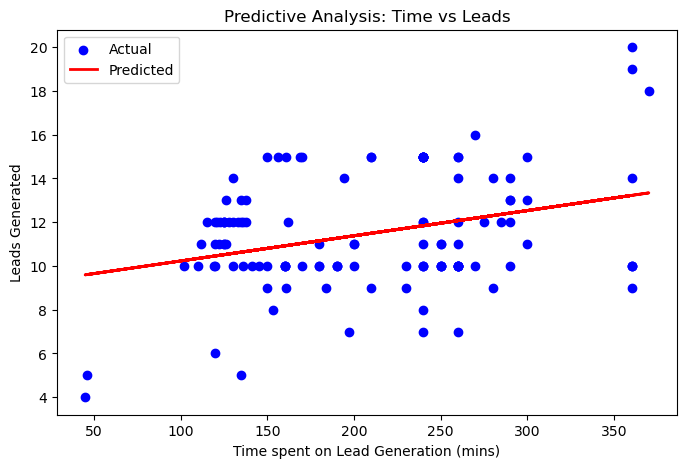

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  r2_score

# Loading Excel file 
file = r"C:\Users\suraj\Desktop\Cleaned Data.xlsx" 
df = pd.read_excel(file)
# Storing required columns in a dataframe
df = df[["Employee Name", "Leads", "Time spent on LG (mins)"]]

#preparing the features (X) and the target variable (y) for a machine learning model
X = df[["Time spent on LG (mins)"]]
y = df["Leads"]

# Training linear regression model
model = LinearRegression()
model.fit(X, y)

#  predicts leads from time spent using the trained model, and stores these predictions in a new column.
df["Predicted Leads"] = model.predict(X)
# Calculating the difference (error) between actual and predicted leads
df["Error"] = df["Leads"] - df["Predicted Leads"]

# Calculating % Error 
df["% Error"] = ((df["Leads"] - df["Predicted Leads"]) / df["Leads"]) * 100


# Calculating overall accuracy metrics (MSE and R²) for the whole dataset
mse = mean_squared_error(y, df["Predicted Leads"])
r2 = r2_score(y, df["Predicted Leads"])

metrics_df = pd.DataFrame({
    "Metric": ["Mean Squared Error", "R² Score"],
    "Value": [mse, r2]
})

# Calculating RMSE and R² for each employee separately
employee_metrics = []
for emp, group in df.groupby("Employee Name"):
    y_true = group["Leads"]
    y_pred = group["Predicted Leads"]
# RMSE = root mean squared error. Lower mean square error is considered as good prediction
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))   
    r2 = r2_score(y_true, y_pred) if len(group) > 1 else None  
    
    employee_metrics.append({
        "Employee Name": emp,
        "RMSE": rmse,
        "R²": r2
    })
employee_metrics_df = pd.DataFrame(employee_metrics)
#Building a summary comparison table for each employee
comparison_df = df.groupby("Employee Name").agg({
    "Leads": "sum",
    "Predicted Leads": "mean",
    "Error": "mean",
    "% Error": "mean"
}).reset_index()

# Printing Tables
print("Model Performance Metrics (Overall):")
print(metrics_df, "\n")

print(" Per-Employee RMSE and R²:")
print(employee_metrics_df, "\n")
print("Per-Employee Comparison:")
print(comparison_df, "\n")

# Plotting actual leads vs predicted leads for visualization
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue", label="Actual")
plt.plot(X, df["Predicted Leads"], color="red", linewidth=2, label="Predicted")
plt.xlabel("Time spent on Lead Generation (mins)")
plt.ylabel("Leads Generated")
plt.title("Predictive Analysis: Time vs Leads")
plt.legend()
plt.show()
